In [1]:
import sys
# for local development
RT_LIBS_PATH = "/Users/alex/Dev_projects/MyOwnRepo/rt_libs/src"
BA_LIBS_PATH = "/Users/alex/Dev_projects/MyOwnRepo/basic_application/src"
sys.path.append(RT_LIBS_PATH)
sys.path.append(BA_LIBS_PATH)

In [2]:
%matplotlib notebook
db_connect_params = {
    "host" : "185.117.118.107",
    "port" : 59000,
    "user" : "alex",
    "password" : "Xrxcmr758",
    "database" : "rt"
}

# DbDataProvider

## Single train dataset downloading

In [3]:
from data_providers import ClickHouseConnector
from data_providers import DbDataProvider
from train_tools import plot_and_go

Cursor created, database connection established
Cursor closed


<IPython.core.display.Javascript object>


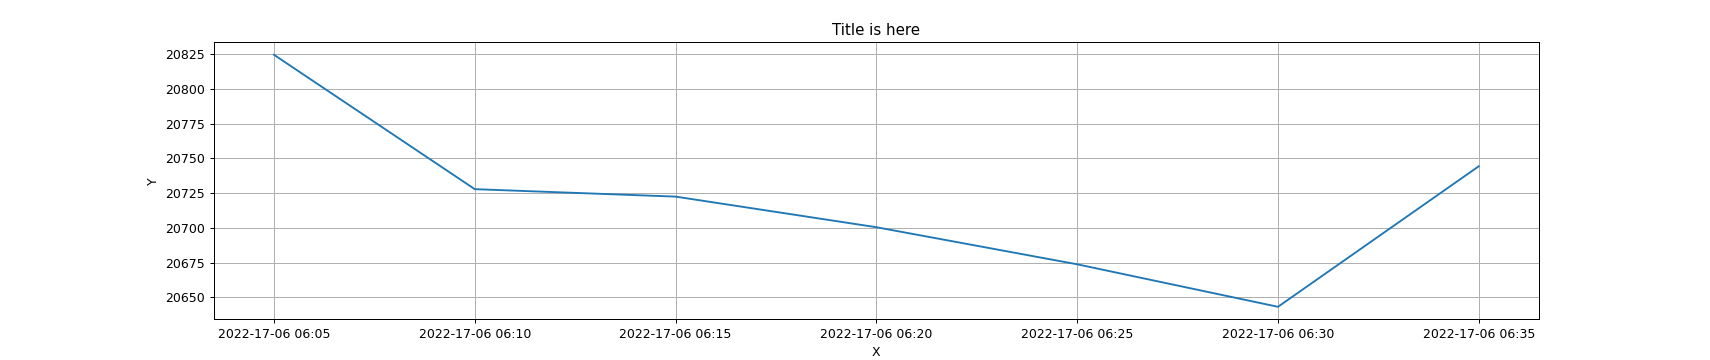

(7, 3)


In [4]:
pair = "USDT_BTC"
start = "2022-06-17 06:00:00"
end = "2022-06-17 06:30:00"
period = 300

with ClickHouseConnector(db_connect_params) as connector:
    
    data_provider = DbDataProvider(connector)
    data = data_provider.get(start, end, period, pairs=["USDT_BTC"])
    
plot_and_go(data, fig_x=19, fig_y=4, dpi=50)




## Multiple train dataset downloading

In [6]:
from data_providers import BatchTaskHandler
from data_providers import ClickHouseConnector
from data_providers import DbDataProvider
from train_tools import plot_and_go

In [7]:
import pandas as pd

class BatchTaskHandler:
    def __init__(self, provider):
        self.provider = provider
        self.pages = list()

    def process(self, tasks, scale_factor=0):
        for task in tasks:
            data = self.provider.get(task["start"], task["end"], task["period"], pairs=task["pairs"])
            self.pages.append(data)
        dataset = self.merge(self.pages, scale_factor)
        return dataset

    @staticmethod
    def merge(data, scale_factor):
        dataset = pd.DataFrame()
        for i in range(len(data)):
            if scale_factor:
                scale = scale_factor / data[i].loc[:, "lowest_ask"].values[0]

                data[i].loc[:, "lowest_ask"] = scale * data[i].loc[:, "lowest_ask"]
                data[i].loc[:, "highest_bid"] = scale * data[i].loc[:, "highest_bid"]

                scale_factor = data[i].loc[:, "lowest_ask"].values[-1]

            dataset = dataset.append(data[i], ignore_index=True)
        return dataset


In [8]:
start = "2022-06-10 00:00:00"
end = "2022-06-13 00:00:00"
period = 60

tasks = [
    {"start": start, "end": end, "period": period, "pairs": ["BTC_LTC"]},
    {"start": start, "end": end, "period": period, "pairs": ["USDT_BTC"]},
    #{"pair": "BTC_XMR", "start": start, "end": end, "period": period},
    #{"pair": "USDT_WIN", "start": start, "end": end, "period": period}
]

Cursor created, database connection established
/var/folders/sk/hq18v07n541fcm73_jz_p_k00000gn/T/ipykernel_59743/577402792.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(data[i], ignore_index=True)
/var/folders/sk/hq18v07n541fcm73_jz_p_k00000gn/T/ipykernel_59743/577402792.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(data[i], ignore_index=True)
Cursor closed


<IPython.core.display.Javascript object>


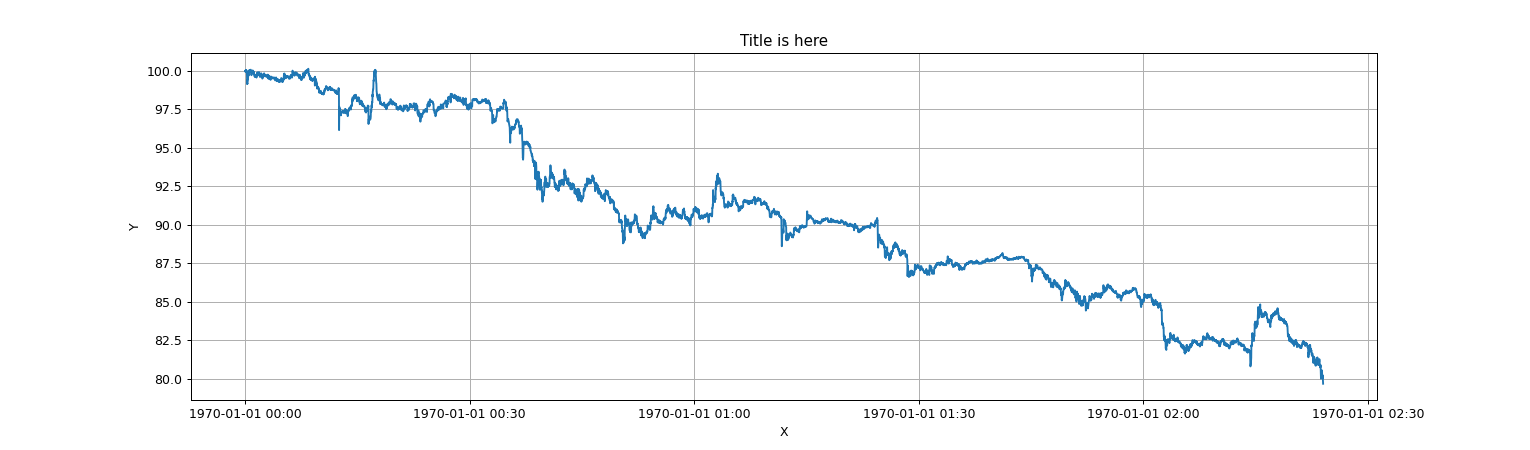

(8642, 3)


In [10]:
with ClickHouseConnector(db_connect_params) as connector:    
    data_provider = DbDataProvider(connector)
    batch_handler = BatchTaskHandler(data_provider)
    dataset = batch_handler.process(tasks, scale_factor=100)
    
plot_and_go(dataset)

## Trade dataset downloading

In [11]:
from data_providers import ClickHouseConnector
from data_providers import DbDataProvider
from train_tools import plot_and_go

import time

Cursor created, database connection established
Cursor closed


<IPython.core.display.Javascript object>


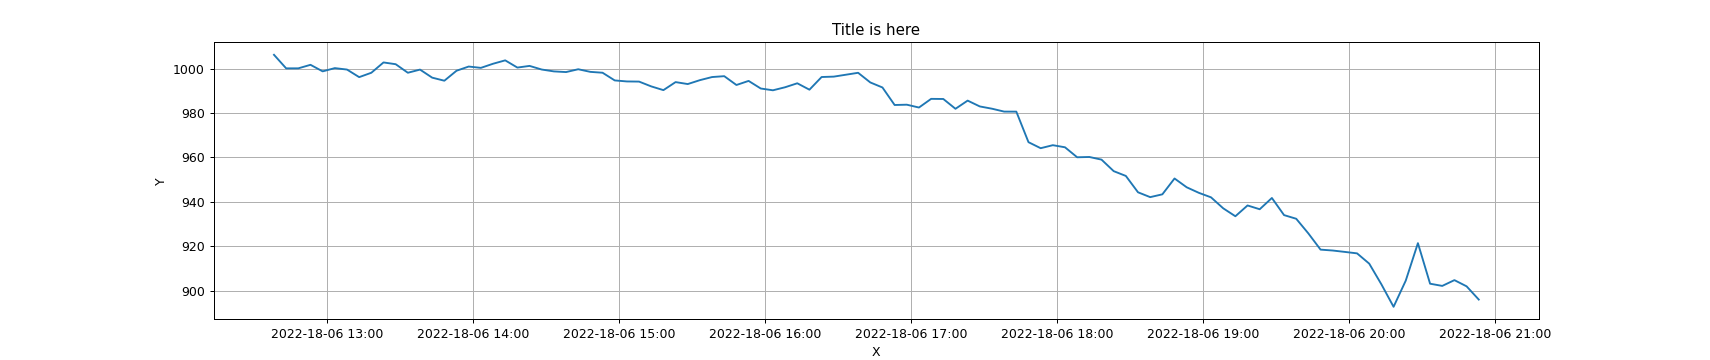

(100, 3)


In [12]:
pair = "USDT_BTC"

ts = int(time.time())
period = 300
num_of_periods = 100
pairs = ["USDT_ETH"]

with ClickHouseConnector(db_connect_params) as connector:
    
    data_provider = DbDataProvider(connector)
    data = data_provider.get_by_periods(ts, period, num_of_periods, pairs=pairs)
    
plot_and_go(data, fig_x=19, fig_y=4, dpi=50)


